# H SAF ASCAT Surface Soil Moisture products
## Overview
The ASCAT Surface Soil Moisture (SSM) products are available in **Near Real-Time (NRT)** or as consistent **Climate Data Record (CDR)** products. The main difference between the two product groups is that, ASCAT NRT SSM is **available 130 minutes after sensing in swath orbit geometry** and ASCAT CDR SSM represents a **consistent long-term data record in time series format**.

### ASCAT NRT SSM products
Four ASCAT NRT SSM products are currently available in NRT, two based on Metop-A and two based on Metop-B. The two products from each satellite differ in their spatial sampling and spatial resolution: **12.5 km spatial sampling (25-34 km spatial resolution)** and **25 km spatial sampling (50 km spatial resolution)**. The ASCAT NRT SSM products are located on a regular swath grid in orbit geometry. Therefore, a re-sampling step to a fixed reference grid is necessary in order to create a time series of multiple ASCAT SSM NRT products.

The main variables and flags included in the ASCAT NRT SSM products are:
* Surface soil moisture: **SOIL_MOISTURE**
* Surface soil moisture noise: **SOIL_MOISTURE_NOISE**
* Sensitivity: **SOIL_MOISTURE_SENSITIVITY**
* Mean surface soil moisture: **MEAN_SURF_SOIL_MOISTURE**
* Frozen soil probability: **FROZEN_SOIL_PROBABILITY**
* Snow cover probability: **SNOW_COVER_PROBABILITY**
* Fracion of inundation or wetland: **INUNDATION_OR_WETLAND**
* Topographic complexity: **TOPOGRAPHICAL_COMPLEXITY**

#### Metop-A and Metop-B ASCAT SSM NRT products
* H101 - Metop-A ASCAT SSM orbit geometry 12.5 km sampling
* H102 - Metop-A ASCAT SSM orbit geometry 25 km sampling
* H16 - Metop-B ASCAT SSM orbit geometry 12.5 km sampling
* H103 - Metop-B ASCAT SSM orbit geometry 25 km sampling

#### Upcoming Metop-C ASCAT SSM NRT products
* H104 - Metop-C ASCAT SSM orbit geometry 12.5 km sampling
* H105 - Metop-C ASCAT SSM orbit geometry 25 km sampling

#### Upcoming Metop-A, Metop-B and Metop-C ASCAT high-resolution SSM NRT products
* H122 - Metop-A ASCAT SSM orbit geometry 6.25 km sampling
* H123 - Metop-B ASCAT SSM orbit geometry 6.25 km sampling
* H124 - Metop-C ASCAT SSM orbit geometry 6.25 km sampling

### ASCAT CDR products and extensions
The ASCAT CDR products are computed once a year (each January) and represent a consistent data set in time series format. An Earth fixed Discrete Global Grid (DGG), the so-called WARP5 DGG, is used as a spatial reference grid. The spatial sampling of the WARP5 DGG is defined as 12.5 km globally. A soil moisture time series is stored for each individual grid point over land.

#### Available CDR
* H25 - Metop ASCAT CDR 12.5 km sampling (2007-2014)
* H109 - Metop ASCAT CDR 12.5 km sampling (2007-2015)
* H111 - Metop ASCAT CDR 12.5 km sampling (2007-2016)
* H113 - Metop ASCAT CDR 12.5 km sampling (2007-2017)

#### Available CDR Extensions
* H108 - Metop ASCAT CDR 12.5 km sampling (2015+)
* H110 - Metop ASCAT CDR 12.5 km sampling (2016+)
* H112 - Metop ASCAT CDR 12.5 km sampling (2017+)
* H114 - Metop ASCAT CDR 12.5 km sampling (2018+)

#### Future CDR
* H115 - Metop ASCAT CDR 12.5 km sampling (2007-2018)
* H117 - Metop ASCAT CDR 12.5 km sampling (2007-2019)
* H119 - Metop ASCAT CDR 12.5 km sampling (2007-2020)
* H121 - Metop ASCAT CDR 12.5 km sampling (2007-2021)

The main variables and flags included in the ASCAT CDR SSM products are:
* Location ID: **LOCATION_ID**
* Surface soil moisture: **SM**
* Surface soil moisture noise: **SM_NOISE**
* Surface state flag: **SSF**
* Orbit direction: **DIR**
* Processing flag: **PROC_FLAG**
* Confidence flag: **CONF_FLAG**
* Correction flag: **CORR_FLAG**
* Satellite ID: **SAT_ID**

## Download, read and visualize ASCAT SSM NRT
In this exercise we will

* Download data from the H SAF FTP
* Move the data into the correct location
* Read data
* Visualize data on maps
* Extract a spatial subset
* Performing some basic statistical analysis


### Data download from H SAF FTP

Each of you should have been given a username and password for reading data from the H SAF FTP. We can use e.g. the terminal to download data.

```
ftp ftphsaf.meteoam.it
username: <your_username>
password: <your_password>
cd products/h16/h16_cur_mon_data
get h16_20181108_103300_METOPB_31863_EUM.buf
exit
```

### Read H16 - Metop-B ASCAT SSM NRT 12.5 km sampling

In [1]:
import os

import numpy as np
from datetime import datetime
import cartopy
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import pytesmo.grid.resample as resample
import pytesmo.colormaps.load_cmap as smcolormaps
import ascat.h_saf as h_saf

test_data_path = os.path.join(os.getcwd(), 'data')
h16_path = os.path.join(test_data_path, 'h16')
h16_reader = h_saf.H16img(h16_path, month_path_str='')

# the reader returns not only the data but also metadata, longitudes and latitudes
h16_data, metadata, timestamp, lons, lats, time_var = h16_reader.read(datetime(2017, 2, 20, 11, 15, 0))
print(type(h16_data))

# the data is a dictionary, each dictionary key contains the array of one variable
print("The following variables are in this image", h16_data.keys())
print(h16_data['Surface Soil Moisture (Ms)'].shape)

# it is only a 1D array to plot the data we also need latitude and logitude information
print(lons.shape)
print(lats.shape)

<type 'dict'>
('The following variables are in this image', ['m_Backscatter', 'Estimated Error In Sigma0 At 40 Deg Incidence Angle', 'Mean Surface Soil Moisture', 'm_Radar Incidence Angle', 'a_ASCAT Land Fraction', 'Orbit Number', 'f_Beam Identifier', 'jd', 'f_ASCAT KP Estimate Quality', 'Snow Cover', 'swath_indicator', 'Dry Backscatter', 'Satellite Identifier', 'a_ASCAT KP Estimate Quality', 'Backscatter', 'Direction Of Motion Of Moving Observing Platform', 'm_Radiometric Resolution (Noise Value)', 'Slope At 40 Deg Incidence Angle', 'm_ASCAT Sigma-0 Usability', 'Topographic Complexity', 'a_Beam Identifier', 'Inundation And Wetland Fraction', 'Cross-Track Cell Number', 'Rain Fall Detection', 'Wet Backscatter', 'line_num', 'm_ASCAT Land Fraction', 'm_Beam Identifier', 'a_Radar Incidence Angle', 'f_ASCAT Land Fraction', 'Soil Moisture Sensitivity', 'f_ASCAT Sigma-0 Usability', 'm_Antenna Beam Azimuth', 'a_ASCAT Sigma-0 Usability', 'Soil Moisture Quality', 'a_Antenna Beam Azimuth', 'a_Rad

### Visualize H16 - Metop-B ASCAT SSM NRT 12.5 km sampling

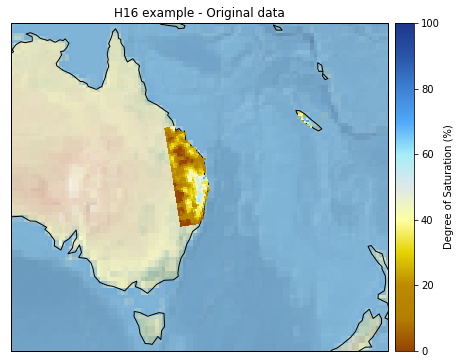

In [2]:
plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('H16 example - Original data')
ax.coastlines()
ax.stock_img()
ax.set_extent([130, 175, -10, -42])

data = h16_data['Surface Soil Moisture (Ms)']
data = np.ma.masked_where((data < 0) | (data > 100), data)

sc = ax.scatter(lons, lats, c=data, zorder=3, marker='s', s=2,
                transform=data_crs, cmap=smcolormaps.load('SWI_ASCAT'),
                vmin=0, vmax=100)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb)
cb1.set_label('Degree of Saturation (%)')

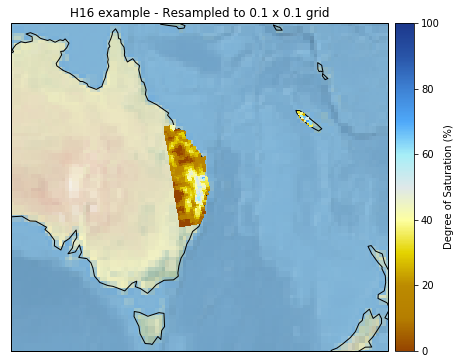

In [3]:
# lets resample to a 0.1 degree grid
# define the grid points in latitude and logitude
lats_dim = np.arange(-80, 80, 0.1)
lons_dim = np.arange(-160, 170, 0.1)

# make 2d grid out the 1D grid spacings
lons_grid, lats_grid = np.meshgrid(lons_dim, lats_dim)
    
resampled_data = resample.resample_to_grid(h16_data, lons, lats, 
                                           lons_grid, lats_grid)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('H16 example - Resampled to 0.1 x 0.1 grid')
ax.coastlines()
ax.stock_img()
ax.set_extent([130, 175, -10, -42])

data = resampled_data['Surface Soil Moisture (Ms)']
data[(data < 0) | (data > 100)] = np.nan

sc = ax.pcolormesh(lons_grid, lats_grid, data, zorder=3, 
                   cmap=smcolormaps.load('SWI_ASCAT'),
                   vmin=0, vmax=100, transform=data_crs)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb)
cb1.set_label('Degree of Saturation (%)')

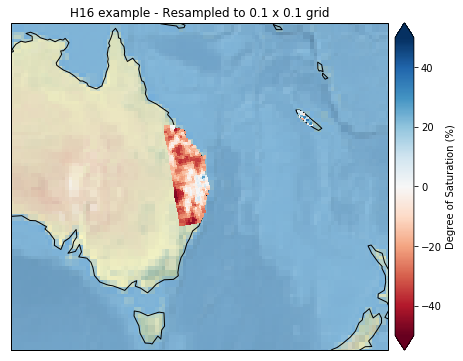

In [4]:
# lets resample to a 0.1 degree grid
# define the grid points in latitude and logitude
lats_dim = np.arange(-80, 80, 0.1)
lons_dim = np.arange(-160, 170, 0.1)

# make 2d grid out the 1D grid spacings
lons_grid, lats_grid = np.meshgrid(lons_dim, lats_dim)
    
resampled_data = resample.resample_to_grid(h16_data, lons, lats, 
                                           lons_grid, lats_grid)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('H16 example - Resampled to 0.1 x 0.1 grid')
ax.coastlines()
ax.stock_img()
ax.set_extent([130, 175, -10, -42])

data = resampled_data['Surface Soil Moisture (Ms)'] 
data[(data < 0) | (data > 100)] = np.nan
data = data - resampled_data['Mean Surface Soil Moisture']

sc = ax.pcolormesh(lons_grid, lats_grid, data, zorder=3, 
                   cmap='RdBu',
                   vmin=-50, vmax=50, transform=data_crs)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb, extend='both')
cb1.set_label('Degree of Saturation (%)')

### Exercise

* Download a product: H16/H101/H102/H103
* Move the data into the correct location
* Read the dataset
* Visualize different variables (map plots)
* (Read multiple datasets and visualize them)

## Download, read and visualize ASCAT SSM CDR
In this exercise we will

* Download data from the H SAF FTP 
* Move the data into the correct location
* Read data
* Visualize data in time series
* Extract a temporal subset
* Performing some basic statistical analysis

### Data download from H SAF FTP

Each of you should have been given a username and password for reading data from the H SAF FTP. We can use e.g. the terminal to download data.

```
ftp ftphsaf.meteoam.it
username: <your_username>
password: <your_password>
cd products/h113
get H113_1431.nc
exit
```

### Read H111 - Metop ASCAT SSM CDR 12.5 km sampling

In [5]:
import os
import ascat.h_saf as h_saf

test_data_path = os.path.join(os.getcwd(), 'data')
h111_path = os.path.join(test_data_path, 'h111')
grid_path = os.path.join(test_data_path, 'grid')
static_layer_path = os.path.join(test_data_path, 'static_layer')

cdr_reader = h_saf.H111Ts(h111_path, grid_path, static_layer_path=static_layer_path)

#### Grid point locator

Grid points can be found using e.g. http://rs.geo.tuwien.ac.at/dv/dgg/

In [7]:
gpi = 2501225
cdr_ts = cdr_reader.read(gpi)
cdr_reader.close()
print(cdr_ts.data.head(3))

                            conf_flag  corr_flag  dir  proc_flag  sat_id  sm  \
2007-01-01 21:06:01.843200          0          0    0          0       3  92   
2007-01-02 09:18:16.848000          0          0    1          0       3  91   
2007-01-03 10:37:43.104000          0          0    1          0       3  93   

                            sm_noise  ssf  snow_prob  frozen_prob  \
2007-01-01 21:06:01.843200         3    1          0           29   
2007-01-02 09:18:16.848000         3    1          0           21   
2007-01-03 10:37:43.104000         3    1         11           29   

                            abs_sm_gldas  abs_sm_noise_gldas  abs_sm_hwsd  \
2007-01-01 21:06:01.843200           NaN                 NaN          NaN   
2007-01-02 09:18:16.848000           NaN                 NaN          NaN   
2007-01-03 10:37:43.104000           NaN                 NaN          NaN   

                            abs_sm_noise_hwsd  
2007-01-01 21:06:01.843200                NaN

### Visualize H111 - Metop ASCAT SSM CDR 12.5 km sampling

/home/shahn/hsaf_conda/envs/work_env/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


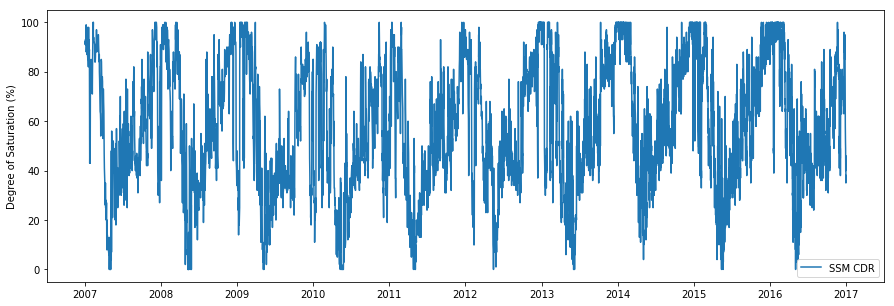

In [8]:
# show complete time series
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts.data['sm'], label='SSM CDR')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

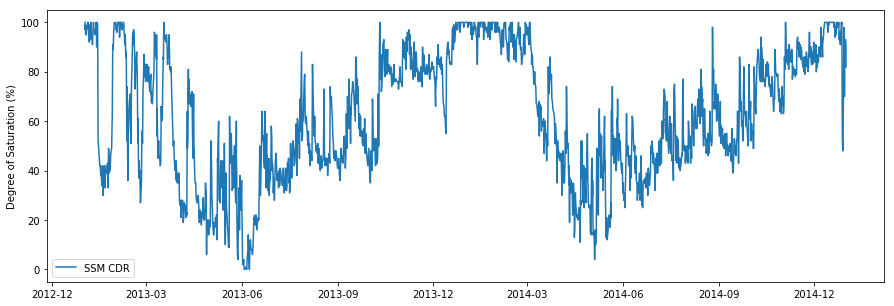

In [9]:
# show time series subset
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts.data['2013':'2014']['sm'], label='SSM CDR')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

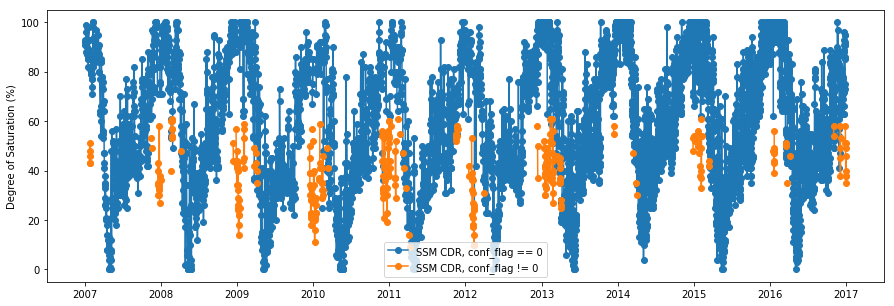

In [10]:
# show sm where 'conf_flag' != 0
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts.data.where(cdr_ts.data['conf_flag'] == 0)['sm'], 
        marker='o', label='SSM CDR, conf_flag == 0')
ax.plot(cdr_ts.data.where(cdr_ts.data['conf_flag'] != 0)['sm'], 
        marker='o', label='SSM CDR, conf_flag != 0')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

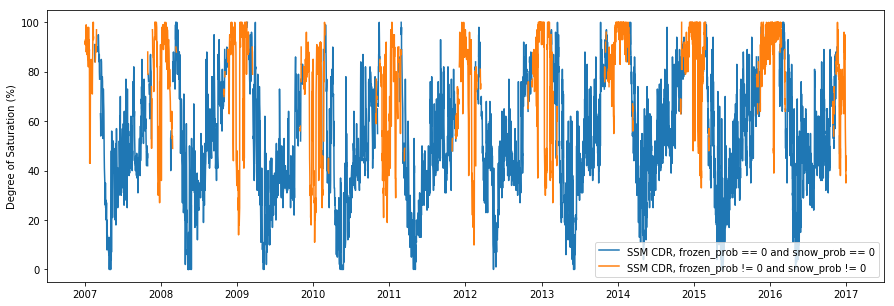

In [11]:
# show sm where 'frozen_prob' == 0
cdr_ts_masked = cdr_ts.data
cdr_ts_masked['valid'] = False
cdr_ts_masked.loc[(cdr_ts.data['frozen_prob'] == 0) & (cdr_ts.data['snow_prob'] == 0), 'valid'] = True

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts_masked.where(cdr_ts_masked['valid'])['sm'], label='SSM CDR, frozen_prob == 0 and snow_prob == 0')
ax.plot(cdr_ts_masked.where(~cdr_ts_masked['valid'])['sm'], label='SSM CDR, frozen_prob != 0 and snow_prob != 0')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

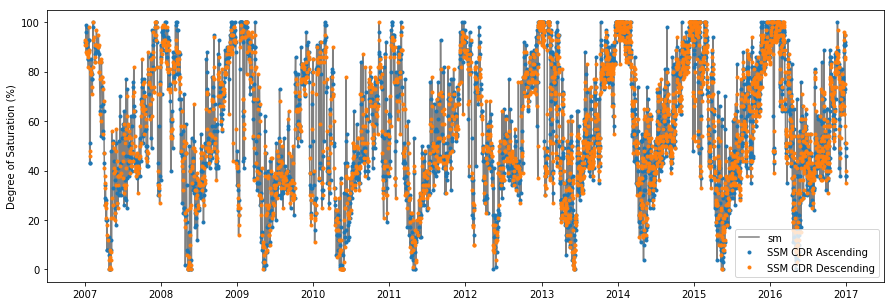

In [12]:
# show descending, ascending
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts.data['sm'], c='gray')
ax.plot(cdr_ts.data['sm'].where(cdr_ts.data['dir'] == 0), label='SSM CDR Ascending', ls='none', marker='.')
ax.plot(cdr_ts.data['sm'].where(cdr_ts.data['dir'] == 1), label='SSM CDR Descending', ls='none', marker='.')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

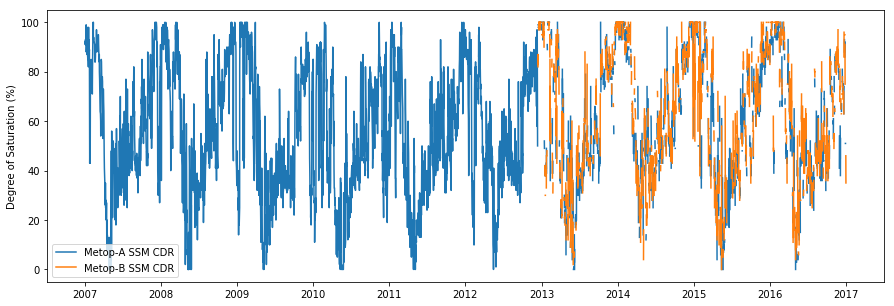

In [13]:
# show metop-a, metop-b
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts.data['sm'].where(cdr_ts.data['sat_id'] == 3), label='Metop-A SSM CDR')
ax.plot(cdr_ts.data['sm'].where(cdr_ts.data['sat_id'] == 4), label='Metop-B SSM CDR')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

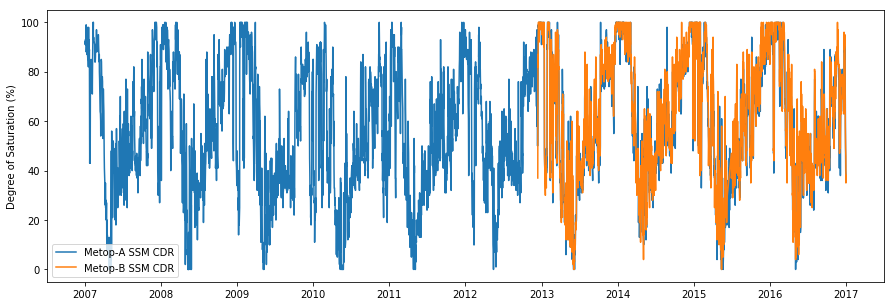

In [14]:
# show metop-a, metop-b
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(cdr_ts.data.loc[cdr_ts.data['sat_id'] == 3, 'sm'], label='Metop-A SSM CDR')
ax.plot(cdr_ts.data.loc[cdr_ts.data['sat_id'] == 4, 'sm'], label='Metop-B SSM CDR')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

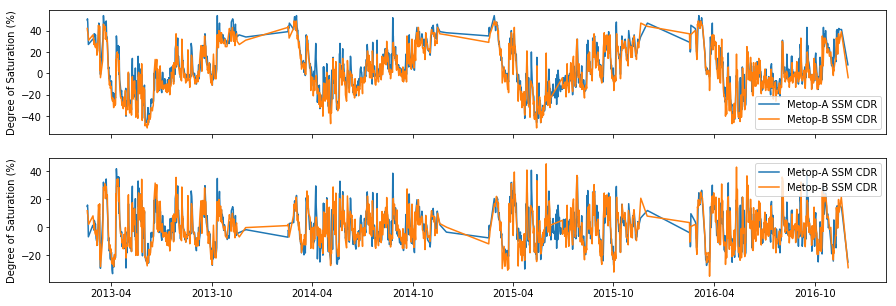

In [15]:
from pytesmo.time_series.anomaly import calc_anomaly

mask = (cdr_ts.data['frozen_prob'] > 0) | (cdr_ts.data['snow_prob'] > 0)
cdr_ts.data = cdr_ts.data.mask(mask)

ssm_a = cdr_ts.data.loc[cdr_ts.data['sat_id'] == 3, 'sm']
ssm_b = cdr_ts.data.loc[cdr_ts.data['sat_id'] == 4, 'sm']

ssm_a_anom = calc_anomaly(cdr_ts.data.loc[cdr_ts.data['sat_id'] == 3, 'sm'])
ssm_b_anom = calc_anomaly(cdr_ts.data.loc[cdr_ts.data['sat_id'] == 4, 'sm'])

# plot anomaly
fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

ax[0].plot(ssm_a['2013':] - ssm_a.median(), label='Metop-A SSM CDR')
ax[0].plot(ssm_b['2013':] - ssm_b.median(), label='Metop-B SSM CDR')
ax[0].set_ylabel('Degree of Saturation (%)')
ax[0].legend()

ax[1].plot(ssm_a_anom['2013':], label='Metop-A SSM CDR')
ax[1].plot(ssm_b_anom['2013':], label='Metop-B SSM CDR')
ax[1].set_ylabel('Degree of Saturation (%)')
ax[1].legend()

### Exercise

* Download a product: H109,H111,H113
* Move the data into the correct location
* Read the dataset
* Visualize different grid points and variables (time series plots)